#  Тестовое задание для стражировки в Avito  
## Автор: Павленко Арсений 
## Часть 1. Первичный анализ данных 

In [1]:
from os.path import join

In [2]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('seaborn-dark')

In [4]:
PATH_TO_DATA = "../../data/01_Avito_dataset/"

# Постановка задачи

Необходимо обучить **классификатор**, предсказывающий **категорию объявления** на Авито по его *<u>заголовку<u>*, *<u>описанию<u>* и *<u>цене<u>*. 

Метрика для оценки качества - **accuracy**. 

# Опиcание набора данных

## Признаки

- `title` - заголовок объявления;
- `description` - описание товара;
- `price` - цена товара.

## Целевая переменная

- `category_id` - категория товара.

# Загрузка данных

In [5]:
train_df = pd.read_csv(join(PATH_TO_DATA,'train.csv'), index_col='item_id')

test_df = pd.read_csv(join(PATH_TO_DATA,'test.csv'), index_col='item_id')

In [6]:
train_df.head(n=10)

,title,description,price,category_id
item_id,,,,
0,Картина,Гобелен. Размеры 139х84см.,1000.0,19
1,Стулья из прессованной кожи,Продам недорого 4 стула из светлой прессованно...,1250.0,22
2,Домашняя мини баня,"Мини баня МБ-1(мини сауна), предназначена для ...",13000.0,37
3,"Эксклюзивная коллекция книг ""Трансаэро"" + подарок","Продам эксклюзивную коллекцию книг, выпущенную...",4000.0,43
4,Ноутбук aser,Продаётся ноутбук ACER e5-511C2TA. Куплен в ко...,19000.0,1
5,Бас гитара invasion bg110,Состояние хорошее. Имеется теплый чехол .,3999.0,50
6,"Смесь ""Грудничок"" г. Зеленодольск",Смесь молочная адаптированная ультрапастеризов...,15.0,41
7,G-shock,Часы абсолютно новые! с коробкой. Часы Китай...,2500.0,36
8,"Санатории Белоруссии. - ""Лепельский военный""",Санатории Белоруссии! - «Лепельский военный» ...,1090.0,48


In [7]:
test_df.head(n=10)

,title,description,price
item_id,,,
489517,Стоик журнальный сталь,продам журнальный столик изготавливаю столы из...,10000.0
489518,iPhone 5 64Gb,"Телефон в хорошем состоянии. Комплект, гаранти...",12500.0
489519,Утеплитель,ТЕПЛОПЕЛЕН-ЛИДЕР ТЕПЛА!!! Толщина утеплителя :...,250.0
489520,Пальто демисезонное,Продам пальто женское (букле) в отличном состо...,1700.0
489521,Samsung syncmaster T200N,"Условно рабочий, проблема в панели настройки м...",1000.0
489522,Дверь Profil Doors Х21,Дверь межкомнатная ProfilDoors 21Х. Серия Х пр...,6600.0
489523,"Новый Cort CR100 в отличном состоянии, с коробкой","Доброго времени суток, Томичи. Срочно нужны де...",13900.0
489524,Кресла,Продаются 2кресла в хорошем состоянии за два 600,600.0
489525,Сверх быстрый YotaPhone 2,"Да , разбит дисплей , но когда экран работает ...",6000.0


# Первичный анализ данных

## 1. Пропуски в данных

In [8]:
is_null = pd.DataFrame(data=[train_df.isnull().sum().values, test_df.isnull().sum().values],
                   columns=train_df.isnull().sum().index,
                   index=['train_df', 'test_df'])

In [9]:
is_null

,title,description,price,category_id
train_df,0,0,0,0.0
test_df,0,0,0,NaN


**Вывод:** в данных нет пропусков. 

## 2. Распределение признаков

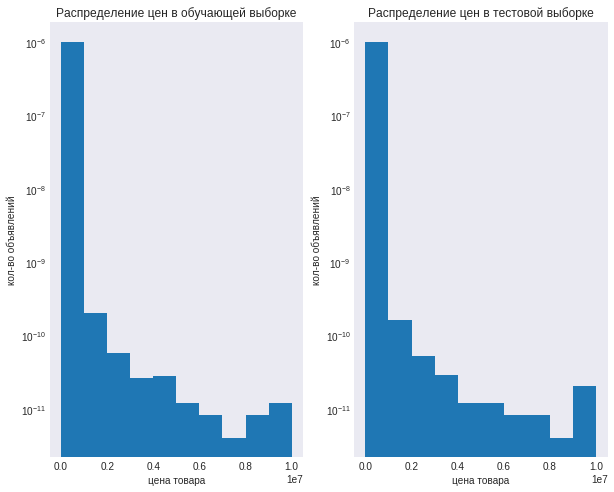

In [14]:
plt.subplot(1, 2, 1)

plt.hist(train_df['price'], log=True, normed=True )
plt.title('Распределение цен в обучающей выборке')
plt.xlabel('цена товара')
plt.ylabel('кол-во объявлений');


plt.subplot(1, 2, 2)
plt.hist(test_df['price'], log=True, normed=True )
plt.title('Распределение цен в тестовой выборке')
plt.xlabel('цена товара')
plt.ylabel('кол-во объявлений');

**Вывод:** скорее всего обучающая и тестовая выборка взяты из одного распределения.

## 3. Соотношение классов

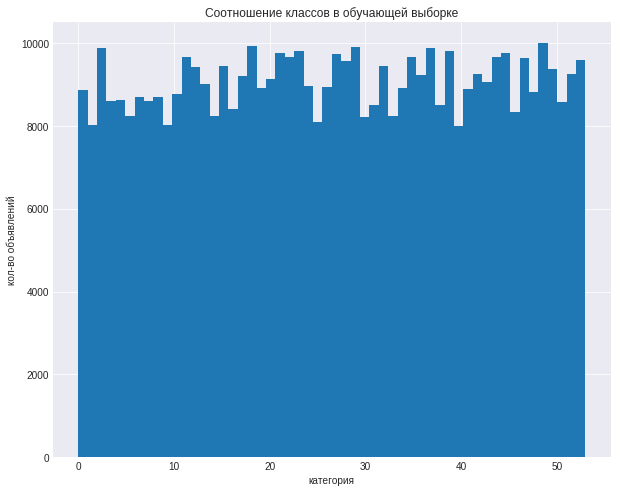

In [18]:
train_df['category_id'].hist(bins=54)
plt.title('Соотношение классов в обучающей выборке')
plt.xlabel('категория')
plt.ylabel('кол-во объявлений');

**Вывод:** скорее всего обучающая и тестовая выборка взяты из одного распределения. 